Wszystkie potrzebne/użyte importy 

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.datasets
from sklearn.model_selection import train_test_split
import numpy
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.neighbors import NearestCentroid
import csv

# Część 1

pobieranie bazy danych covertype

In [19]:
dataset = sklearn.datasets.fetch_covtype()

In [20]:
dir(dataset) # dir zwraca listę atrybutów danego obiektu

['DESCR', 'data', 'target']

Zbiór danych składa się z 7-dmiu różnych klas - etykiety 1-7 i wertor wartości cech

In [21]:
X_data, y_data = dataset.data, dataset.target #podział danych na macierz cech i wektor klas
print(X_data.shape, y_data.shape)
training_set, test_set, training_labels, test_labels = train_test_split(X_data, y_data, test_size=0.2, random_state=3)
print(training_set.shape, training_labels.shape)

(581012, 54) (581012,)
(464809, 54) (464809,)


wizualizacja danych przy użyciu TSNE

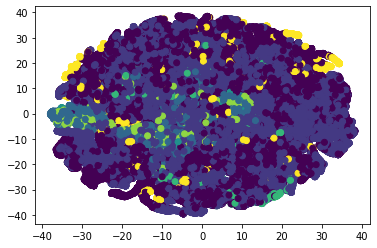

In [159]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(test_set)

xs=transformed[:,0]
ys=transformed[:,1]
plt.figure()
plt.scatter(xs,ys,c=test_labels)
plt.show()

Implementacja klasyfikatora kNN

ustalam parametr k na 3 oraz podział danych treningowe/testowe 80/20%

In [44]:
k = 3

training_set, test_set, training_labels, test_labels = train_test_split(X_data, y_data, test_size=0.2, random_state=3)

Sprawdzenie działania na małej próbce danych

In [135]:
NN3=[]
for i in range(0,10):
    distances_vec = np.sum((np.tile(test_set[i],(np.shape(training_set)[0],1)) - training_set)**2, axis=1)
    sorted_indices = np.argsort( distances_vec )[:k].astype(int)                              
    nearest_neighbours = np.array(training_labels)[sorted_indices]
    #print(list(nearest_neighbours),max(list(nearest_neighbours)))
    NN3 = np.insert(NN3,i,max(nearest_neighbours))

Uczenie klasyfikatora (print tylko w ramach kontroli)

In [ ]:
NN1 = []
for i in range(0,len(test_set)):
    distances_vec = np.sum((np.tile(test_set[i],(np.shape(training_set)[0],1)) - training_set)**2, axis=1)
    sorted_indices = np.argsort( distances_vec )[:k].astype(int)                              
    nearest_neighbours = np.array(training_labels)[sorted_indices]
    #print(nearest_neighbours)
    NN1 = np.insert(NN1, i, max(nearest_neighbours))
%time

In [137]:
output = []
for x in NN1:
    if x not in output:
        output.append(x)
print(output)

[1.0, 2.0, 3.0, 7.0, 6.0, 5.0, 4.0]


 KNeighborsClassifier ze scikit-learn

In [138]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(training_set, training_labels) 
predicted_groups = classifier.predict(test_set)

In [139]:
print(predicted_groups[:10])
print(test_labels[:10])

[1 1 2 2 1 1 3 1 1 1]
[1 1 2 2 1 1 3 1 1 1]


Porównanie wyników (confusion matrix, wykres k vs accuracy)

In [141]:
as_sklearn_NN = accuracy_score(test_labels, predicted_groups, normalize=True)

Wykres wyniku dopasowania w zależności od ilości sąsiadów

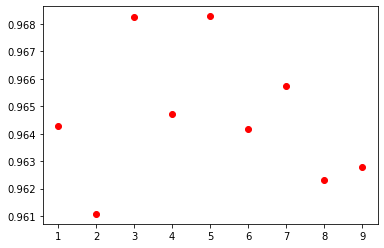

In [163]:
plt.figure()
for k in range(1,10):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(training_set, training_labels) 
    predicted_groups = classifier.predict(test_set)
    ac = accuracy_score(test_labels, predicted_groups, normalize=True)
    plt.plot(k,ac, 'ro')
plt.show()

W tym przypadku, większa ilosć sąsiadów nie jest równoznaczna z lepszym wynikiem dopasowania

In [142]:
as_own_NN = accuracy_score(test_labels, NN1, normalize=True)

confusion_matrix dla klasyfikatora kNN z sklearn

In [143]:
confusion_matrix(test_labels, predicted_groups)

array([[40761,  1233,     0,     0,    17,     1,   105],
       [ 1188, 55573,    79,     0,   117,    67,    15],
       [    1,    73,  6842,    27,     8,    96,     0],
       [    0,     1,    76,   453,     0,    21,     0],
       [   22,   164,    15,     0,  1667,     8,     1],
       [    3,    75,   131,    11,     3,  3321,     0],
       [  107,    22,     0,     0,     1,     0,  3898]])

confusion_matrix dla własnego klasyfikatora kNN

In [148]:
confusion_matrix(test_labels, NN1)

array([[38188,  3520,     3,     0,    54,     6,   346],
       [  167, 56006,   221,     1,   419,   171,    54],
       [    0,     9,  6594,   100,    35,   309,     0],
       [    0,     0,    14,   478,     0,    59,     0],
       [    2,    25,     5,     0,  1824,    19,     2],
       [    0,    16,    23,     5,     0,  3500,     0],
       [   13,     3,     0,     0,     0,     0,  4012]])

Porównanie klasyfikatorów kNN

Porówanie na podstawie accuracy_score

In [147]:
porownanie1 = { 'Klasyfikator' : ['kNN', 'kNN sklearn'],
            'Wynik' : [as_own_NN, as_sklearn_NN]
        }
df = pd.DataFrame(porownanie1, columns = ['Klasyfikator', 'Wynik'])
print(df)

  Klasyfikator     Wynik
0          kNN  0.951800
1  kNN sklearn  0.968262


Implementacja  i trening klasyfikatora NM

In [54]:
clf = NearestCentroid()
clf.fit(training_set, training_labels) 
predictNM = clf.predict(test_set)

Implementacja własnego NM

In [51]:
NM2=[]
k1=1
for i in range(0,len(test_set)):
    mean2 = np.mean(training_set)
    distances_vec = np.sum((np.tile(test_set[i],(np.shape(training_set)[0],1)) - mean2)**2, axis=1)
    sorted_indices = np.argsort( distances_vec )[:k1].astype(int)                              
    nearest_neighbours = np.array(training_labels)[sorted_indices]
    #print(distances_vec,sorted_indices,nearest_neighbours)
    NM2 = np.insert(NM2,i,max(nearest_neighbours))

In [52]:
as_own_NM = accuracy_score(test_labels, NM2, normalize=True)

In [55]:
as_NM = accuracy_score(test_labels, predictNM, normalize=True)

Porównanie własnego NM i kNM z pakietu sklearn

In [56]:
porowanie3 = { 'Klasyfikator' : ['NM', 'kNM sklearn'],
            'Wynik' : [as_own_NM, as_NM]
        }
df3 = pd.DataFrame(porowanie3, columns = ['Klasyfikator', 'Wynik'])
print(df3)

  Klasyfikator     Wynik
0           NM  0.351724
1  kNM sklearn  0.196448


Porówanie klasyfikatorów

In [157]:
porowanie2 = { 'Klasyfikator' : ['kNN', 'kNN sklearn', 'kNM'],
            'Wynik' : [as_own_NN, as_sklearn_NN, as_NM]
        }
df2 = pd.DataFrame(porowanie2, columns = ['Klasyfikator', 'Wynik'])
print(df2)

  Klasyfikator     Wynik
0          kNN  0.951800
1  kNN sklearn  0.968262
2          kNM  0.192198


Pod względem zużycia pamięci, najlepiej sprawdził się algorytm kNN wbudowany w bibliotekę sklearn 

# Część 2

Korzystając z biblioteki PyTorch Img2Vec przerabiam każde zdjecie na wektor cech (jest ich 512 dla każdego obrazu), funkcja ta korzysta z modelu sieci ResNet-18 i pobiera przetrenowane wagi. Można dodatkowo wybrać korzystanie z GPU lub CPU. Poniżej przykładowe zastosowanie, później jest to rozwiązanie jest zaimplementowane do funkcji z Laboratiorium2. 

In [ ]:
from img2vec_pytorch import Img2Vec
from PIL import Image

# Initialize Img2Vec with GPU
img2vec = Img2Vec(cuda=False)
# Read in an image
img = Image.open('/home/justyna/Desktop/SEMESTR2/PUM/MachineLearning/GTSRB/Final_Training/Images/00000/00000_00000.ppm')
# Get a vector from img2vec, returned as a torch FloatTensor
vec = img2vec.get_vec(img)

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import csv

# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header !!!!!!!!!!!!!!!!!!TUTAJ NALEŻY KONIECZKIE ZMIENIĆ ORYGINAŁ
        # loop over all images in current annotations file
        for row in gtReader:
            x1,y1,x2,y2 = map(int,row[3:7])
            img = Image.open(prefix + row[0])
            images.append(img2vec.get_vec(img)) # the 1th column is the filename
            labels.append(int(row[7])) # the 8th column is the label# TU ZMIENIĆ ODROBINKĘ
        gtFile.close()
    return np.array(images), np.array(labels)# I TU JESZCZE TROCHĘ

In [61]:
path = '/home/justyna/Desktop/SEMESTR2/PUM/MachineLearning/GTSRB/Final_Training/Images'
images, labels = readTrafficSigns(path)

In [62]:
class_names=["zakazu", "ostrzegawcze", "informacyjne", "nakazu"]
sign_groups = [0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,3,3,3,3,3,3,3,3,0,0]
labels_groups = np.array([sign_groups[cls] for cls in labels])

Podział danych na treningowe i testowe 

In [70]:
train_set_i, test_set_i, train_labels_i, test_labels_i = train_test_split(images, labels, test_size=0.2, random_state=3)

Wizualizacja danych 

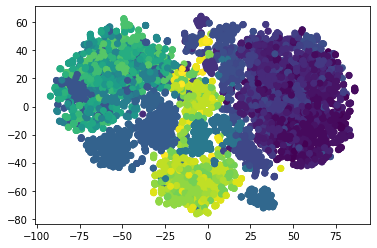

In [77]:
model = TSNE(learning_rate=100)
transformed = model.fit_transform(test_set_i)

xs=transformed[:,0]
ys=transformed[:,1]
plt.figure()
plt.scatter(xs,ys,c=test_labels_i)
plt.show()

Algorytm najbliżeszgo sąsiada

In [73]:
NNi = []
k = 1
for i in range(0,len(test_set_i)):
    distances_vec = np.sum((np.tile(test_set_i[i],(np.shape(train_set_i)[0],1)) - train_set_i)**2, axis=1)
    sorted_indices = np.argsort( distances_vec )[:k].astype(int)                              
    nearest_neighbours = np.array(train_labels_i)[sorted_indices]
    #print(nearest_neighbours)
    NNi = np.insert(NNi, i, max(nearest_neighbours))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs


In [74]:
NMi=[]
k1=1
for i in range(0,len(test_set_i)):
    mean2 = np.mean(train_set_i)
    distances_vec = np.sum((np.tile(test_set_i[i],(np.shape(train_set_i)[0],1)) - mean2)**2, axis=1)
    sorted_indices = np.argsort( distances_vec )[:k1].astype(int)                              
    nearest_neighbours = np.array(train_labels_i)[sorted_indices]
    #print(distances_vec,sorted_indices,nearest_neighbours)
    NMi = np.insert(NMi,i,max(nearest_neighbours))

In [75]:
as_NNi = accuracy_score(test_labels_i, NNi, normalize=True)
as_NMi = accuracy_score(test_labels_i, NMi, normalize=True)

Porównanie klasyfikatorów

In [76]:
porowanie4 = { 'Klasyfikator' : ['kNN', 'kNM'],
            'Wynik' : [as_NNi, as_NMi]
        }
df4 = pd.DataFrame(porowanie4, columns = ['Klasyfikator', 'Wynik'])
print(df4)

  Klasyfikator     Wynik
0          kNN  0.993879
1          kNM  0.047437
